In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Importing the dataset

In [2]:
full_dataset = pd.read_csv("D:/programming/full_datasetpy.csv")

In [3]:
full_dataset = full_dataset[["Year","Month","DayofMonth","ArrDelay","DepDelay", "CRSDepTime","Origin", "Dest","TailNum","total_delay","LateAircraftDelay"]]

## Converting to date time variable

In [4]:
Minutes = full_dataset.CRSDepTime.astype(str).str[-2:]

In [5]:
Hours = full_dataset.CRSDepTime.astype(str).str[:-2]
Hours[Hours == ""] = "0"

In [6]:
Day = full_dataset.DayofMonth.astype(str)
Day = Day.apply(lambda x: '{0:0>2}'.format(x))

In [7]:
full_dataset["date_time"] = pd.to_datetime(
            Day.astype(str) + "-" + full_dataset.Month.astype(str) + "-" + full_dataset.Year.astype(str) + "," + Hours + ":" + Minutes, 
            format='%d-%m-%Y,%H:%M')
full_dataset["date_time"]

0          2005-01-28 16:05:00
1          2005-01-29 16:05:00
2          2005-01-30 16:10:00
3          2005-01-31 16:05:00
4          2005-01-02 19:00:00
                   ...        
13985533   2006-12-29 12:49:00
13985534   2006-12-29 11:55:00
13985535   2006-12-29 21:15:00
13985536   2006-12-29 21:27:00
13985537   2006-12-29 20:45:00
Name: date_time, Length: 13985538, dtype: datetime64[ns]

In [8]:
pd.isnull(full_dataset).sum(axis = 0)

Year                 0
Month                0
DayofMonth           0
ArrDelay             0
DepDelay             0
CRSDepTime           0
Origin               0
Dest                 0
TailNum              0
total_delay          0
LateAircraftDelay    0
date_time            0
dtype: int64

## Arranging by tail number and date_time

In [9]:
full_dataset = full_dataset.groupby('TailNum').apply(lambda x: x.sort_values('date_time'))
full_dataset

Year  Month  DayofMonth  ArrDelay  DepDelay  CRSDepTime  \
TailNum                                                                    
0       492222   2005      1           2      13.0       7.0         310   
        492342   2005      1           2       1.0      16.0         415   
        492983   2005      1           5      -5.0       0.0         810   
        493194   2005      1           5       3.0      20.0        2320   
        193474   2005      1          29      53.0      40.0        1100   
...               ...    ...         ...       ...       ...         ...   
n816ca  1908301  2005      4          29      11.0       0.0        1758   
        1908489  2005      4          29     -11.0      -2.0        2110   
        1908601  2005      4          30      -8.0      -5.0         535   
        1909128  2005      4          30       2.0       0.0        1450   
        1909506  2005      4          30       5.0      10.0        2055   

                Origin Dest TailNum  total_delay  LateAircraftDelay  \
TailNum                                                               
0       492222     JFK  SJU       0         20.0                  0   
        492342     SJU  JFK       0         17.0                  0   
        492983     IAD  FLL       0         -5.0                  0   
        493194     SMF  IAD       0         23.0                  0   
        193474     CVG  ROC       0         93.0                  0   
...                ...  ...     ...          ...                ...   
n816ca  1908301    IND  CVG  n816ca         11.0                  0   
        1908489    CVG  MSN  n816ca        -13.0                  0   
        1908601    MSN  CVG  n816ca        -13.0                  0   
        1909128    CVG  MCO  n816ca          2.0                  0   
        1909506    MCO  RDU  n816ca         15.0                  0   

                          date_time  
TailNum                              
0       492222  2005-01-02 03:10:00  
        492342  2005-01-02 04:15:00  
        492983  2005-01-05 08:10:00  
        493194  2005-01-05 23:20:00  
        193474  2005-01-29 11:00:00  
...                             ...  
n816ca  1908301 2005-04-29 17:58:00  
        1908489 2005-04-29 21:10:00  
        1908601 2005-04-30 05:35:00  
        1909128 2005-04-30 14:50:00  
        1909506 2005-04-30 20:55:00  

[13985538 rows x 12 columns]

## Remove rows with tail numbers 0

In [31]:
test = full_dataset.loc[full_dataset['TailNum'] != '0']

## Checking if tailnum and Dest-Origin match

In [37]:
test["name_match"] = (test.Origin == test.Dest.shift(1)) 
test["tailnum_match"] = (test[('TailNum')] == test[('TailNum')].shift(1))
test

Year  Month  DayofMonth  ArrDelay  DepDelay  CRSDepTime  \
TailNum                                                                    
N050AA  438162   2005      1           3      66.0      82.0         715   
        444645   2005      1           3      14.0      22.0        1525   
        444778   2005      1           4     -17.0      -1.0         920   
        435823   2005      1           4      -2.0       0.0        1630   
        448047   2005      1           6      64.0      71.0        2150   
...               ...    ...         ...       ...       ...         ...   
n816ca  1908301  2005      4          29      11.0       0.0        1758   
        1908489  2005      4          29     -11.0      -2.0        2110   
        1908601  2005      4          30      -8.0      -5.0         535   
        1909128  2005      4          30       2.0       0.0        1450   
        1909506  2005      4          30       5.0      10.0        2055   

                Origin Dest TailNum  total_delay  LateAircraftDelay  \
TailNum                                                               
N050AA  438162     JFK  SJU  N050AA        148.0                  0   
        444645     SJU  BOS  N050AA         36.0                  0   
        444778     BOS  SJU  N050AA        -18.0                  0   
        435823     SJU  JFK  N050AA         -2.0                  0   
        448047     JFK  SJU  N050AA        135.0                  0   
...                ...  ...     ...          ...                ...   
n816ca  1908301    IND  CVG  n816ca         11.0                  0   
        1908489    CVG  MSN  n816ca        -13.0                  0   
        1908601    MSN  CVG  n816ca        -13.0                  0   
        1909128    CVG  MCO  n816ca          2.0                  0   
        1909506    MCO  RDU  n816ca         15.0                  0   

                          date_time  name_match  tailnum_match  
TailNum                                                         
N050AA  438162  2005-01-03 07:15:00       False          False  
        444645  2005-01-03 15:25:00        True           True  
        444778  2005-01-04 09:20:00        True           True  
        435823  2005-01-04 16:30:00        True           True  
        448047  2005-01-06 21:50:00        True           True  
...                             ...         ...            ...  
n816ca  1908301 2005-04-29 17:58:00        True           True  
        1908489 2005-04-29 21:10:00        True           True  
        1908601 2005-04-30 05:35:00        True           True  
        1909128 2005-04-30 14:50:00        True           True  
        1909506 2005-04-30 20:55:00        True           True  

[13985323 rows x 14 columns]

In [38]:
test['tailnum_match'] = test.tailnum_match.astype(int)
test['name_match'] = test.name_match.astype(int)
test

Year  Month  DayofMonth  ArrDelay  DepDelay  CRSDepTime  \
TailNum                                                                    
N050AA  438162   2005      1           3      66.0      82.0         715   
        444645   2005      1           3      14.0      22.0        1525   
        444778   2005      1           4     -17.0      -1.0         920   
        435823   2005      1           4      -2.0       0.0        1630   
        448047   2005      1           6      64.0      71.0        2150   
...               ...    ...         ...       ...       ...         ...   
n816ca  1908301  2005      4          29      11.0       0.0        1758   
        1908489  2005      4          29     -11.0      -2.0        2110   
        1908601  2005      4          30      -8.0      -5.0         535   
        1909128  2005      4          30       2.0       0.0        1450   
        1909506  2005      4          30       5.0      10.0        2055   

                Origin Dest TailNum  total_delay  LateAircraftDelay  \
TailNum                                                               
N050AA  438162     JFK  SJU  N050AA        148.0                  0   
        444645     SJU  BOS  N050AA         36.0                  0   
        444778     BOS  SJU  N050AA        -18.0                  0   
        435823     SJU  JFK  N050AA         -2.0                  0   
        448047     JFK  SJU  N050AA        135.0                  0   
...                ...  ...     ...          ...                ...   
n816ca  1908301    IND  CVG  n816ca         11.0                  0   
        1908489    CVG  MSN  n816ca        -13.0                  0   
        1908601    MSN  CVG  n816ca        -13.0                  0   
        1909128    CVG  MCO  n816ca          2.0                  0   
        1909506    MCO  RDU  n816ca         15.0                  0   

                          date_time  name_match  tailnum_match  
TailNum                                                         
N050AA  438162  2005-01-03 07:15:00           0              0  
        444645  2005-01-03 15:25:00           1              1  
        444778  2005-01-04 09:20:00           1              1  
        435823  2005-01-04 16:30:00           1              1  
        448047  2005-01-06 21:50:00           1              1  
...                             ...         ...            ...  
n816ca  1908301 2005-04-29 17:58:00           1              1  
        1908489 2005-04-29 21:10:00           1              1  
        1908601 2005-04-30 05:35:00           1              1  
        1909128 2005-04-30 14:50:00           1              1  
        1909506 2005-04-30 20:55:00           1              1  

[13985323 rows x 14 columns]

In [39]:
test['full_match'] = test['tailnum_match'] & test['name_match']

## Lagging delay to create previous delay column

In [40]:
test.loc[test['full_match'] == 1 , 'previous_delay'] = test["total_delay"].shift(1)
test.loc[test['full_match'] == 0, 'previous_delay'] = "none"

In [41]:
test

Year  Month  DayofMonth  ArrDelay  DepDelay  CRSDepTime  \
TailNum                                                                    
N050AA  438162   2005      1           3      66.0      82.0         715   
        444645   2005      1           3      14.0      22.0        1525   
        444778   2005      1           4     -17.0      -1.0         920   
        435823   2005      1           4      -2.0       0.0        1630   
        448047   2005      1           6      64.0      71.0        2150   
...               ...    ...         ...       ...       ...         ...   
n816ca  1908301  2005      4          29      11.0       0.0        1758   
        1908489  2005      4          29     -11.0      -2.0        2110   
        1908601  2005      4          30      -8.0      -5.0         535   
        1909128  2005      4          30       2.0       0.0        1450   
        1909506  2005      4          30       5.0      10.0        2055   

                Origin Dest TailNum  total_delay  LateAircraftDelay  \
TailNum                                                               
N050AA  438162     JFK  SJU  N050AA        148.0                  0   
        444645     SJU  BOS  N050AA         36.0                  0   
        444778     BOS  SJU  N050AA        -18.0                  0   
        435823     SJU  JFK  N050AA         -2.0                  0   
        448047     JFK  SJU  N050AA        135.0                  0   
...                ...  ...     ...          ...                ...   
n816ca  1908301    IND  CVG  n816ca         11.0                  0   
        1908489    CVG  MSN  n816ca        -13.0                  0   
        1908601    MSN  CVG  n816ca        -13.0                  0   
        1909128    CVG  MCO  n816ca          2.0                  0   
        1909506    MCO  RDU  n816ca         15.0                  0   

                          date_time  name_match  tailnum_match  full_match  \
TailNum                                                                      
N050AA  438162  2005-01-03 07:15:00           0              0           0   
        444645  2005-01-03 15:25:00           1              1           1   
        444778  2005-01-04 09:20:00           1              1           1   
        435823  2005-01-04 16:30:00           1              1           1   
        448047  2005-01-06 21:50:00           1              1           1   
...                             ...         ...            ...         ...   
n816ca  1908301 2005-04-29 17:58:00           1              1           1   
        1908489 2005-04-29 21:10:00           1              1           1   
        1908601 2005-04-30 05:35:00           1              1           1   
        1909128 2005-04-30 14:50:00           1              1           1   
        1909506 2005-04-30 20:55:00           1              1           1   

                previous_delay  
TailNum                         
N050AA  438162            none  
        444645           148.0  
        444778            36.0  
        435823           -18.0  
        448047            -2.0  
...                        ...  
n816ca  1908301           24.0  
        1908489           11.0  
        1908601          -13.0  
        1909128          -13.0  
        1909506            2.0  

[13985323 rows x 16 columns]

In [42]:
test = test.loc[test['previous_delay'] != 'none']

In [43]:
pd.isnull(test).sum(axis = 0)

Year                 0
Month                0
DayofMonth           0
ArrDelay             0
DepDelay             0
CRSDepTime           0
Origin               0
Dest                 0
TailNum              0
total_delay          0
LateAircraftDelay    0
date_time            0
name_match           0
tailnum_match        0
full_match           0
previous_delay       0
dtype: int64

## calculating pearson correlation coefficient

In [44]:
test['previous_delay'] = test.previous_delay.astype(int)
test['LateAircraftDelay'] = test.LateAircraftDelay.astype(int)

In [47]:
test['LateAircraftDelay'].corr(test['previous_delay'])

0.5180291559137409

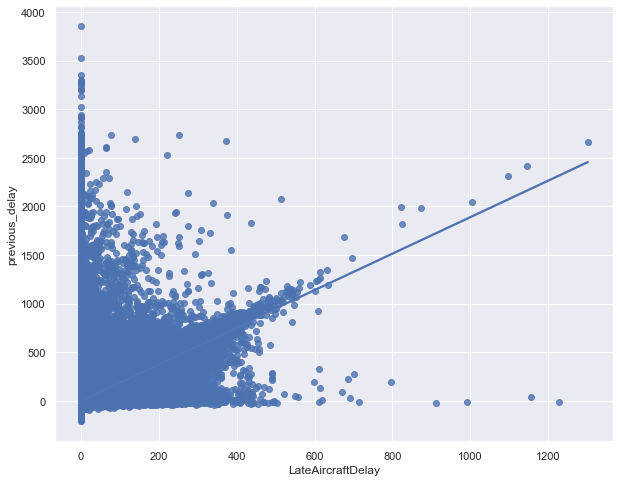

In [48]:
sns.set(rc={'figure.figsize':(10,8)})
sns.regplot(x="LateAircraftDelay", y="previous_delay", data=test)
plt.savefig('regplotq4.png')

## network graph

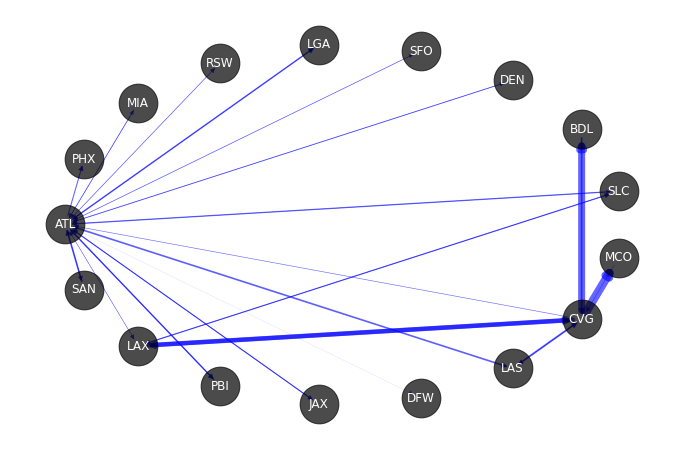

In [76]:
import networkx as nx
subset = test[(test['TailNum']=="N106DA") & (test['Year']== 2005) & (test['Month']== 1)]
network = subset[["Origin", "Dest","ArrDelay"]]
network['ArrDelay']= network.ArrDelay/10

Graph =nx.from_pandas_edgelist(network, 'Origin', 'Dest', edge_attr='ArrDelay', create_using=nx.DiGraph() )
graph = nx.DiGraph()
widths = nx.get_edge_attributes(Graph , 'ArrDelay')
nodelist = Graph.nodes()
plt.figure(figsize=(12,8))

pos = nx.shell_layout(Graph)
nx.draw_networkx_nodes(Graph,pos,
                       nodelist=nodelist,
                       node_size=1500,
                       node_color='black',
                       alpha=0.7)
nx.draw_networkx_edges(Graph,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='blue',
                       alpha=0.6)
nx.draw_networkx_labels(Graph, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='white')
plt.box(False)
plt.savefig("networkq4.png")
plt.show()
